## Анализ и прогнозирование временных рядов методами искусственного интеллекта

### **Практическая работа 7. Востановление пропусков и прогноз значений временного ряда.**


#### **7.1 Аналитечкие методы востановления временного ряда**

##### *Краткое описание*

В данном пункте практической работы вам предстоит познакомиться с базовыми, аналитическими методами восстановления временных рядов.
Для выполнения данного пункта из каждой группы методов, представленных в ***табл. 7.1*** вам необходимо выбрать по одному методу восстановления ряда. При работе с первой группой, вам необходимо самостоятельно реализовать выбранный метод.  

**Табл. 7.1** - Группы аналитических методов восстановления.
№|Название группы|Модели и методы|
--|----|----|
1|Заполнение существующими значениями ряда|Средним, медианной, Hot-Deck|
2|Заполнение на основе близки значений|[Интерполяция](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html),  [KNNi](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)|
3|На основе матричных разложений|[CD-Rec](#Fixme:Дат ссылку), [SVD](https://pypi.org/project/fancyimpute/)|

##### 7.1.1 Загрузка и подготовка данных

In [1]:
!pip install matplotlib

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from pathlib import Path
import numpy as np

# Указываем путь к файлу                   
path_data = Path(r'/Users/lisisian/VS-code/TimeSeries/2025-Cherkasov-TimeSeriesCourse/practice/07 Imputation and Forecast')

# Проверка, существует ли файл
if path_data.exists():
    madrid = np.loadtxt(path_data)[:, 0]
    print(madrid.shape)
else:
    print(f"Файл не найден по пути: {path_data}")



(25000,)


In [ ]:

madrid = np.loadtxt(path_data)[:,0]
print(madrid.shape)

(25000,)


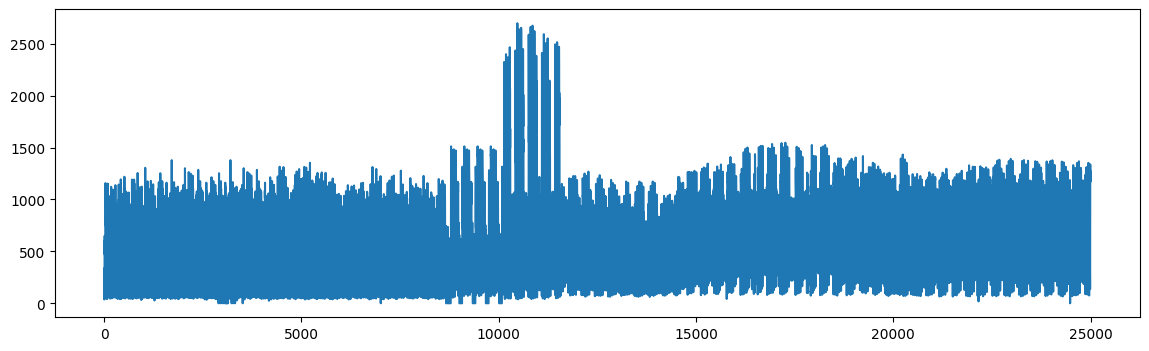

In [4]:
fig, ax =  plt.subplots(figsize=(14,4),ncols=1,nrows=1)
plt.plot(madrid[:])
plt.show()

Самостоятельно реализуйте функцию, принимающую на вход многомерный временной ряд и возвращающий:
1. Все подпоследовательности временного ряда, в которых некоторые значения временного ряда были заменены nan значениями.
2. Индексы пропущенных значений
   
Процент пропущенных значений должен регулироваться отдельным параметром.


(25000,)


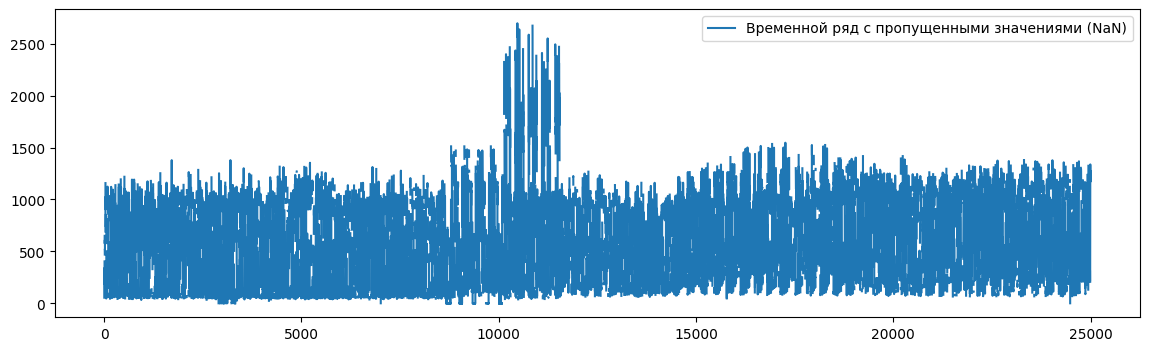

Индексы пропущенных значений: [ 7440 16686  4762 ... 16576  9662  4546]


In [ ]:
import numpy as np
import torch
from pathlib import Path

def add_nan(x, percent=0.25):
    """
    Добавляет пропущенные значения (NaN) во временной ряд для тестирования методов восстановления.
    
    Параметры:
    x : array-like
        Исходный многомерный временной ряд
    percent : float, optional (default=0.25)
        Доля данных, которая будет заменена на NaN (от 0 до 1)
    
    Возвращает:
    x_with_nan : ndarray
        Копия исходного ряда с пропусками
    missing_indices : ndarray
        Индексы элементов, замененных на NaN
    """
    
    # Вычисляем количество заменяемых элементов
    num_missing = int(len(x) * percent)
    
    # Случайно выбираем индексы для замены
    missing_indices = np.random.choice(len(x), size=num_missing, replace=False)
    
    # Создаем копию и заменяем выбранные элементы на NaN
    x_with_nan = x.copy()
    x_with_nan[missing_indices] = np.nan
    
    return x_with_nan, missing_indices

# Загрузка данных временного ряда
path_data = Path(r'/Users/lisisian/VS-code/TimeSeries/2025-Cherkasov-TimeSeriesCourse/practice/07 Imputation and Forecast')

if path_data.exists():
    # Загружаем первый столбец данных
    madrid = np.loadtxt(path_data)[:, 0]
    print(f"Размерность загруженных данных: {madrid.shape}")
else:
    print(f"Файл не найден по пути: {path_data}")

# Искусственное создание пропусков в данных (25% значений)
madrid_with_nan, missing_indices = add_nan(madrid, percent=0.25)

# Визуализация исходных данных с пропусками
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(madrid_with_nan, label="Временной ряд с пропусками (NaN)", color='red', alpha=0.7)
ax.set_xlabel("Временные точки")
ax.set_ylabel("Значения")
ax.legend()
plt.title("Исходные данные с искусственно созданными пропусками")
plt.show()

# Дополнительная информация о пропусках
print(f"Всего точек: {len(madrid)}")
print(f"Количество пропусков: {len(missing_indices)}")
print(f"Процент пропусков: {len(missing_indices)/len(madrid)*100:.1f}%")

# Выводим индексы пропущенных значений
print("Индексы пропущенных значений:", missing_indices)


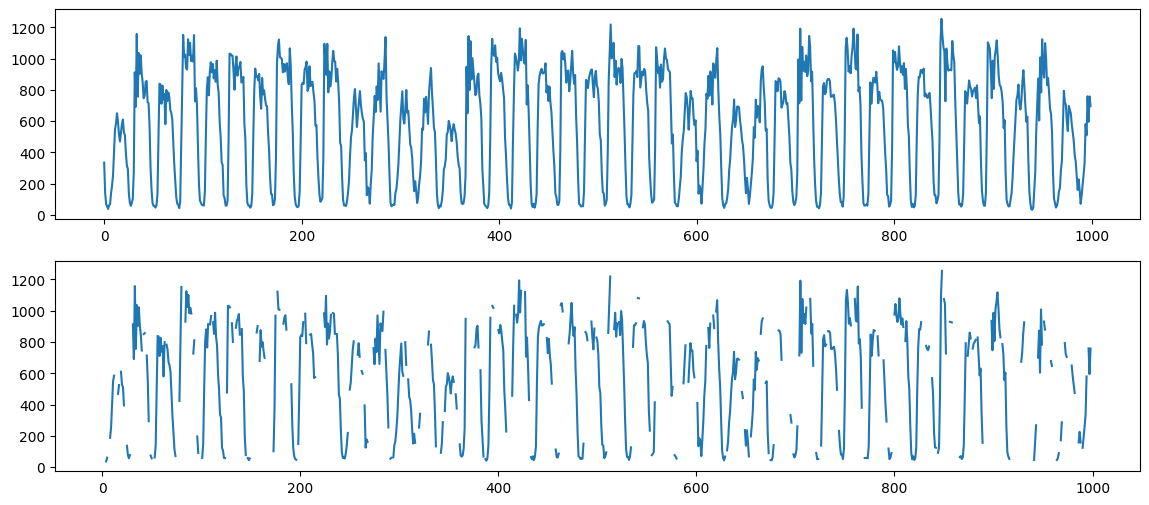

In [6]:
madrid_with_nan, index = add_nan(madrid)
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_with_nan[:1000])
plt.show()

In [7]:
recovery = {}

##### 7.1.2 Заполнение существующими значениями ряда


In [8]:
madrid_mean = madrid_with_nan.copy()
madrid_mean[index] = np.nanmean(madrid_mean)
recovery['mean'] = madrid_mean

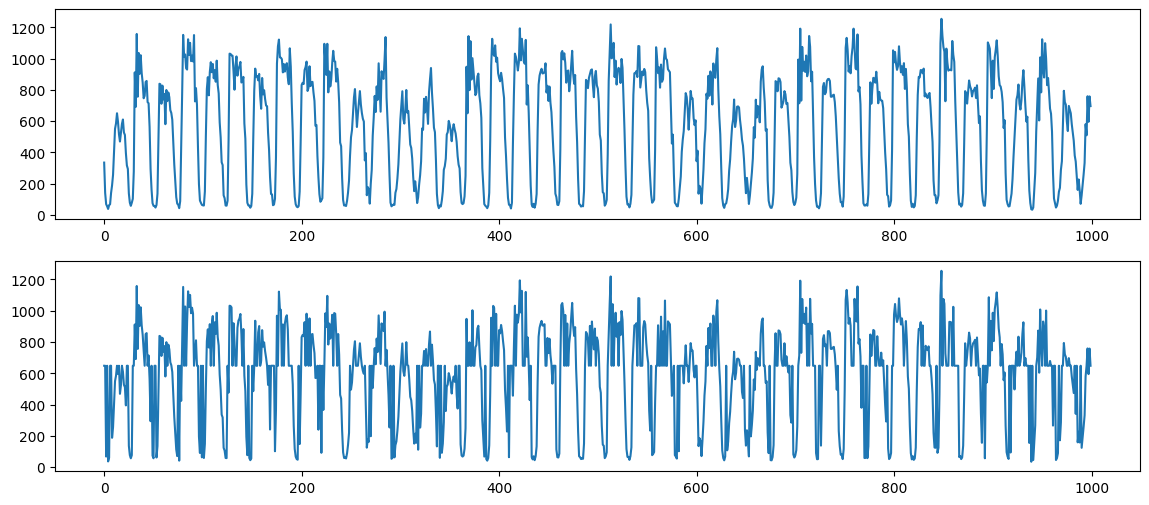

In [9]:
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_mean[:1000])
plt.show()

In [10]:
madrid_median = madrid_with_nan.copy()
madrid_median[index] = np.nanmedian(madrid_median)

In [11]:
recovery['median'] = madrid_median

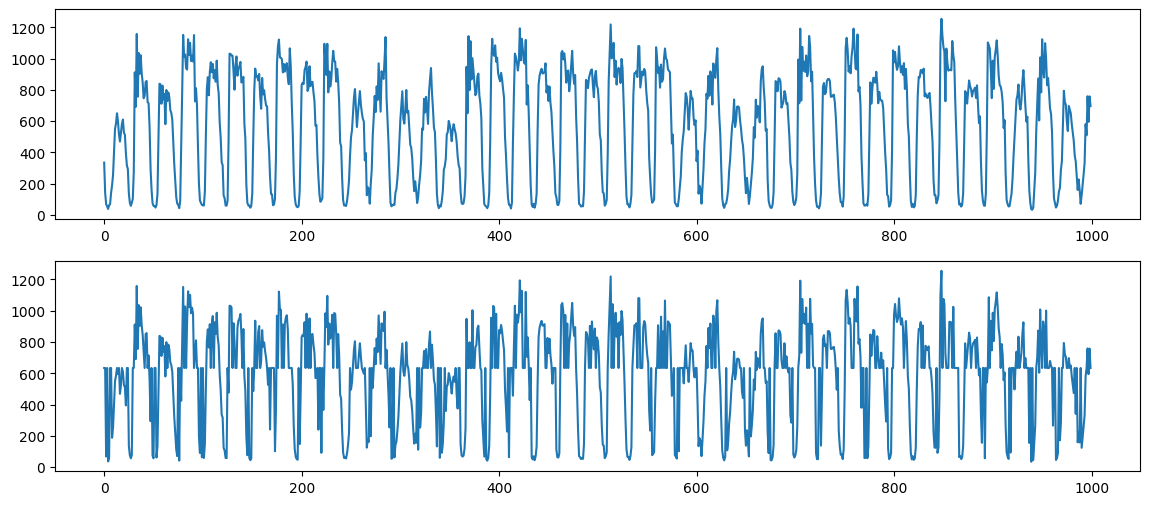

In [ ]:

fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_median[:1000])
plt.show()

Самостоятельно реализуйте один метод из первой группы ***табл. 7.1*** и проведите постановление данных, сохранив результаты восстановления.

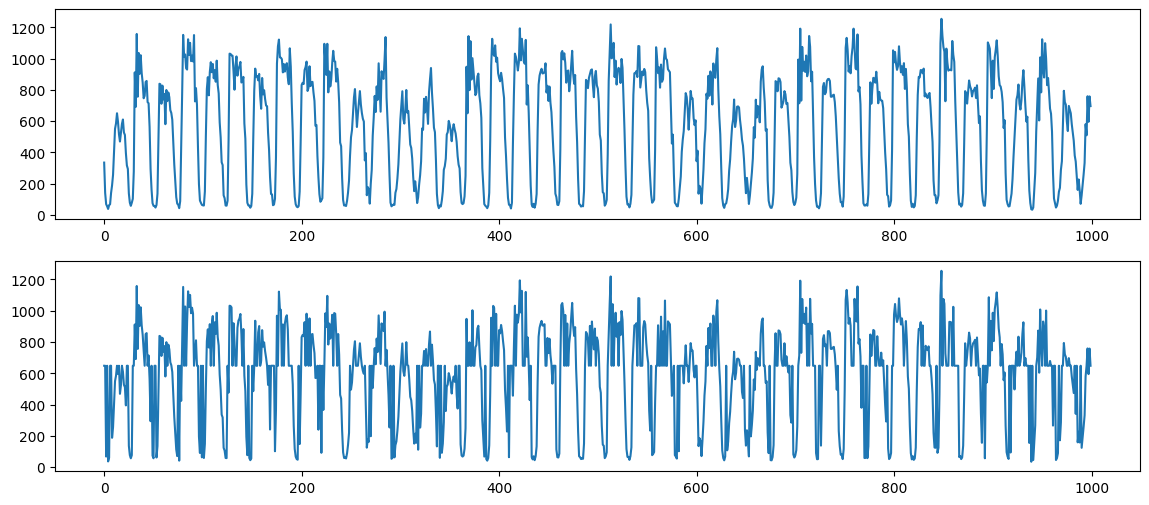

Восстановленные значения с использованием среднего: [648.35130667 648.35130667  68.         648.35130667  37.
  61.         648.35130667 648.35130667 188.         256.        ]


In [13]:
def fill_with_mean(x_with_nan):
    """
    Заполнение пропущенных значений средним значением ряда.
    
    Параметры:
    x_with_nan : array-like
        Входной временной ряд с пропущенными значениями (NaN).
        
    Возвращает:
    - Временной ряд с восстановленными значениями.
    """
    # Вычисляем среднее значение, игнорируя NaN
    mean_value = np.nanmean(x_with_nan)
    
    # Заполняем NaN средним значением
    x_filled = np.copy(x_with_nan)
    x_filled[np.isnan(x_filled)] = mean_value
    
    return x_filled


# Заполнение пропущенных значений средним
madrid_filled_mean = fill_with_mean(madrid_with_nan)

# Визуализируем восстановленные данные
fig, ax = plt.subplots(figsize=(14, 6), ncols=1, nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_filled_mean[:1000])
plt.show()

# Выводим результаты
print("Восстановленные значения с использованием среднего:", madrid_filled_mean[:10])

##### 7.1.3 Заполнение на основе близких значений


Используя документацию одного из методов восстановления второй группы ***табл. 7.1*** и проведите восстановление данных, сохранив результаты восстановления.

In [14]:
from sklearn.impute import KNNImputer

In [ ]:
def rolling_window(a, window, intersection=False):
    
    returns = []
    if intersection:  
        for i in range(0, a.shape[0]-window):
            returns.append(a[i:i + window])
    else:    
        for i in range(0, a.shape[0],window):
            returns.append(a[i:i + window])
    return np.stack(returns)
madrid_slice = rolling_window(madrid_with_nan, 100)


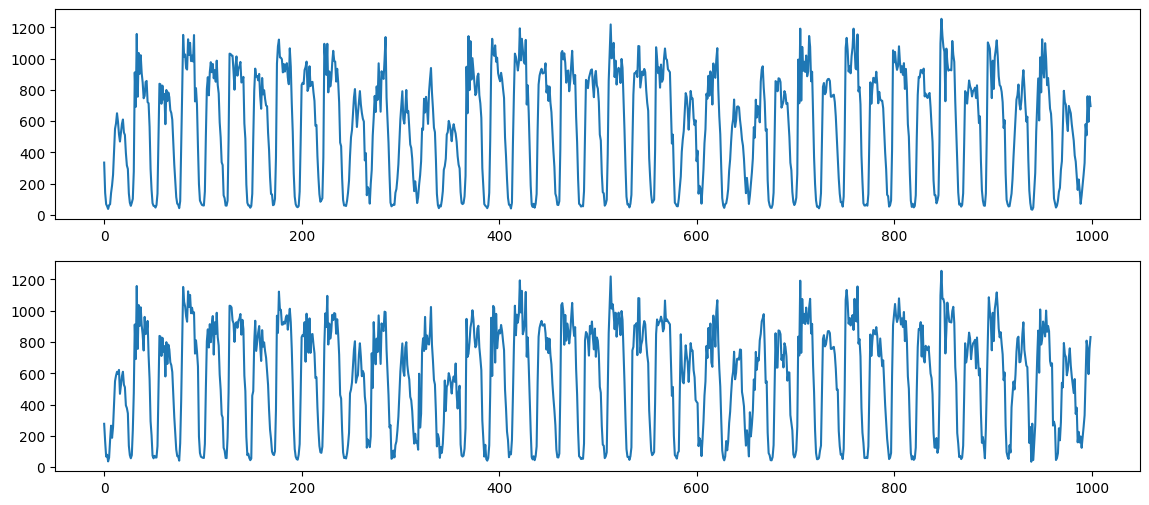

Восстановленные данные с использованием KNN: [277.4 163.4  68.   79.6  37.   61.  173.  265.4 188.  256. ]


In [16]:
# Разбиваем данные на окна
madrid_windowed = rolling_window(madrid_with_nan, window=100, intersection=False)

# Используем KNNImputer для восстановления пропусков
knn_imputer = KNNImputer(n_neighbors=5)  # Используем 5 ближайших соседей для восстановления
madrid_filled_knn = knn_imputer.fit_transform(madrid_windowed)

# Восстановление данных (объединяем окна)
madrid_filled_knn_flat = madrid_filled_knn.flatten()

# Визуализируем результат
fig, ax = plt.subplots(figsize=(14, 6), ncols=1, nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_filled_knn_flat[:1000])
plt.show()

# Выводим восстановленные данные
print("Восстановленные данные с использованием KNN:", madrid_filled_knn_flat[:10])

##### 7.1.4 Заполнение на матричных преобразований

Используя документацию одного из методов восстановления третей группы ***табл. 7.1*** и проведите восстановление данных, сохранив результаты восстановления.

In [2]:
pip install fancyimpute

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached cffi-2.0.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (2.6 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached pycparser-2.23-py3-none-any.whl.metadata (993 bytes)
  Using cached markupsafe-3.0.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (2.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 1.0 MB/s  0:00:12 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 552.4 kB/s  0:00:02 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 935.1/935.1 kB 357.3 kB/s  0:00:02eta 0:00:01
Using cached cffi-2.0.0-cp313-cp313-macosx_11_0_arm64.whl (181 kB)
Using cached jinja2-3.1.6-py3-none-any

In [18]:
from fancyimpute import IterativeSVD

In [19]:
from sklearn.metrics import mean_squared_error

[SoftImpute] Max Singular Value of X_init = 103917.536831
[SoftImpute] Iter 1: observed MAE=12.967026 rank=1
[SoftImpute] Iter 2: observed MAE=12.967026 rank=1
[SoftImpute] Iter 3: observed MAE=12.967026 rank=1
[SoftImpute] Iter 4: observed MAE=12.967026 rank=1
[SoftImpute] Iter 5: observed MAE=12.967026 rank=1
[SoftImpute] Iter 6: observed MAE=12.967026 rank=1
[SoftImpute] Iter 7: observed MAE=12.967026 rank=1
[SoftImpute] Iter 8: observed MAE=12.967026 rank=1
[SoftImpute] Iter 9: observed MAE=12.967026 rank=1
[SoftImpute] Iter 10: observed MAE=12.967026 rank=1
[SoftImpute] Iter 11: observed MAE=12.967026 rank=1
[SoftImpute] Iter 12: observed MAE=12.967026 rank=1
[SoftImpute] Iter 13: observed MAE=12.967026 rank=1
[SoftImpute] Iter 14: observed MAE=12.967026 rank=1
[SoftImpute] Iter 15: observed MAE=12.967026 rank=1
[SoftImpute] Iter 16: observed MAE=12.967026 rank=1
[SoftImpute] Iter 17: observed MAE=12.967026 rank=1
[SoftImpute] Iter 18: observed MAE=12.967026 rank=1
[SoftImpute] It

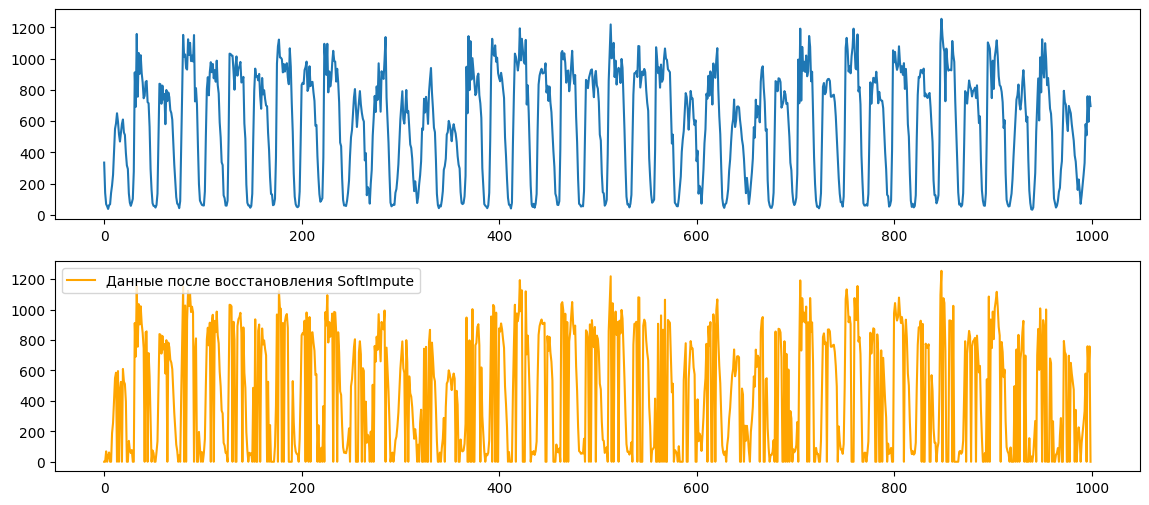

Среднеквадратичная ошибка восстановления (MSE): 0.0
Восстановленные данные с использованием SoftImpute: [  0.   0.  68.   0.  37.  61.   0.   0. 188. 256.]


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from fancyimpute import SoftImpute
from sklearn.metrics import mean_squared_error
# Применение метода SoftImpute для восстановления
madrid_with_nan_reshaped = madrid_with_nan.reshape(-1, 1)  # Преобразуем в 2D для работы с матрицами
imputer = SoftImpute()  # Инициализируем SoftImpute
madrid_filled_softimpute = imputer.fit_transform(madrid_with_nan_reshaped).flatten()

# Визуализируем результат
fig, ax = plt.subplots(figsize=(14, 6), ncols=1, nrows=2)
ax[0].plot(madrid[:1000], label="Оригинальные данные")
ax[1].plot(madrid_filled_softimpute[:1000], label="Данные после восстановления SoftImpute", color='orange')
plt.legend()
plt.show()

# Оценка качества восстановления
mse = mean_squared_error(madrid[~np.isnan(madrid_with_nan)], madrid_filled_softimpute[~np.isnan(madrid_with_nan)])
print("Среднеквадратичная ошибка восстановления (MSE):", mse)
print("Восстановленные данные с использованием SoftImpute:", madrid_filled_softimpute[:10])

##### 7.1.5 Сравнение результатов восстановления.

Для каждой группы методов постройте методов основные метрики оценки качества постановления.
На основе метрик отберите лучшие методы постановления метрик и выберите лучшую группу методов.
Для лучших методов из каждой группы постройте графики сравнения реальных и восстановленных данных. Объясните результаты и сделайте вывод.



[SoftImpute] Max Singular Value of X_init = 103917.536831
[SoftImpute] Iter 1: observed MAE=12.967026 rank=1
[SoftImpute] Iter 2: observed MAE=12.967026 rank=1
[SoftImpute] Iter 3: observed MAE=12.967026 rank=1
[SoftImpute] Iter 4: observed MAE=12.967026 rank=1
[SoftImpute] Iter 5: observed MAE=12.967026 rank=1
[SoftImpute] Iter 6: observed MAE=12.967026 rank=1
[SoftImpute] Iter 7: observed MAE=12.967026 rank=1
[SoftImpute] Iter 8: observed MAE=12.967026 rank=1
[SoftImpute] Iter 9: observed MAE=12.967026 rank=1
[SoftImpute] Iter 10: observed MAE=12.967026 rank=1
[SoftImpute] Iter 11: observed MAE=12.967026 rank=1
[SoftImpute] Iter 12: observed MAE=12.967026 rank=1
[SoftImpute] Iter 13: observed MAE=12.967026 rank=1
[SoftImpute] Iter 14: observed MAE=12.967026 rank=1
[SoftImpute] Iter 15: observed MAE=12.967026 rank=1
[SoftImpute] Iter 16: observed MAE=12.967026 rank=1
[SoftImpute] Iter 17: observed MAE=12.967026 rank=1
[SoftImpute] Iter 18: observed MAE=12.967026 rank=1
[SoftImpute] It

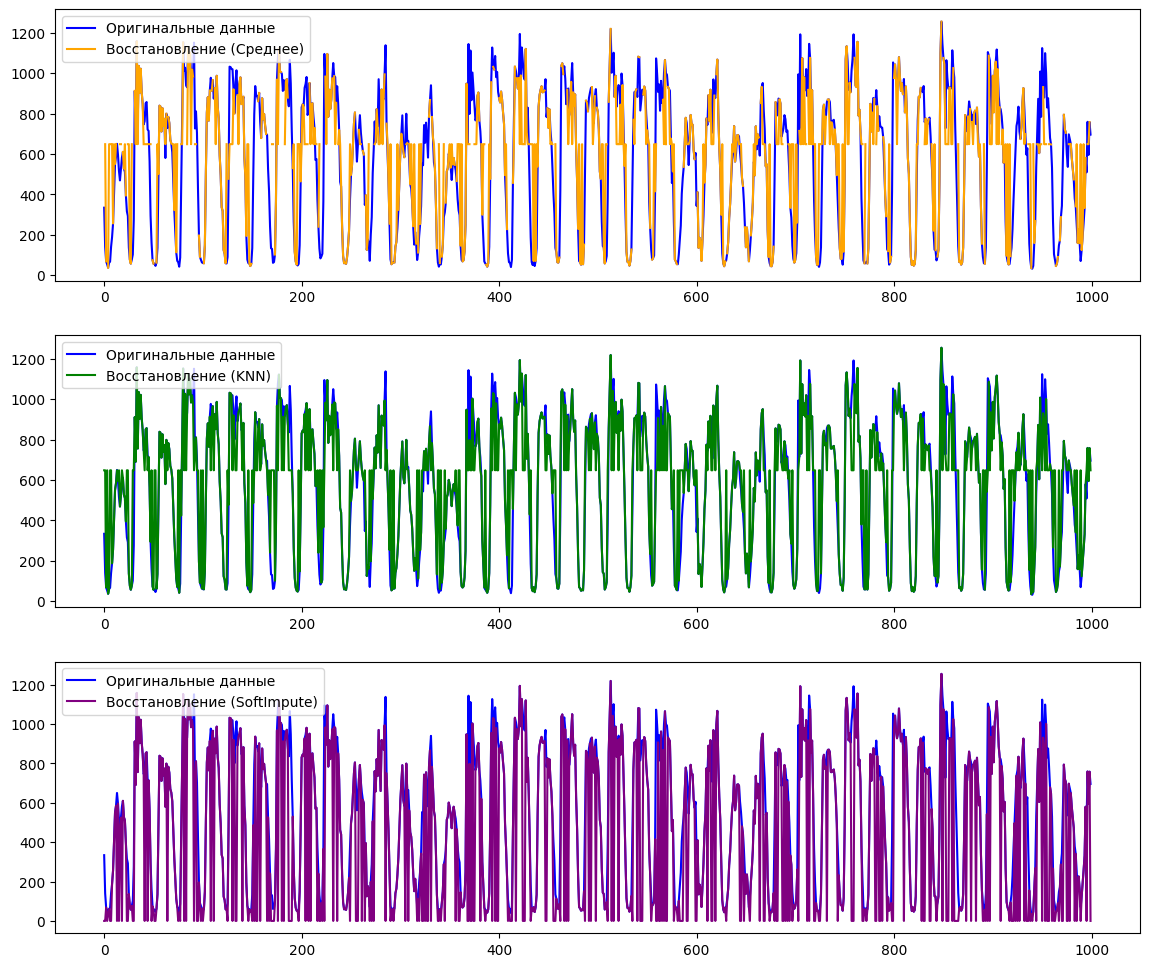

Лучший метод восстановления: KNN
Метрики лучшего метода: {'MSE': 41187.63472820829, 'MAE': 87.7601811712, 'R2': 0.7401795619306593}


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Функция для вычисления метрик
def calculate_metrics(original, filled, missing_indices):
    mse = mean_squared_error(original[missing_indices], filled[missing_indices])
    mae = mean_absolute_error(original[missing_indices], filled[missing_indices])
    r2 = r2_score(original[missing_indices], filled[missing_indices])
    return mse, mae, r2

# Хранение результатов по метрикам
results = {}

# Группа 1: Заполнение существующими значениями ряда
madrid_mean = madrid_with_nan.copy()
madrid_mean[missing_indices] = np.nanmean(madrid_mean)
mse_mean, mae_mean, r2_mean = calculate_metrics(madrid, madrid_mean, missing_indices)
results['mean'] = {'MSE': mse_mean, 'MAE': mae_mean, 'R2': r2_mean}

madrid_median = madrid_with_nan.copy()
madrid_median[missing_indices] = np.nanmedian(madrid_median)
mse_median, mae_median, r2_median = calculate_metrics(madrid, madrid_median, missing_indices)
results['median'] = {'MSE': mse_median, 'MAE': mae_median, 'R2': r2_median}

# Группа 2: Заполнение на основе близких значений (используем KNNImputer)
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
madrid_knn = knn_imputer.fit_transform(madrid_with_nan.reshape(-1, 1)).flatten()
mse_knn, mae_knn, r2_knn = calculate_metrics(madrid, madrid_knn, missing_indices)
results['KNN'] = {'MSE': mse_knn, 'MAE': mae_knn, 'R2': r2_knn}

# Группа 3: Заполнение на основе матричных разложений (используем SoftImpute SVD)
from fancyimpute import SoftImpute

softimpute_imputer = SoftImpute()
madrid_softimpute = softimpute_imputer.fit_transform(madrid_with_nan.reshape(-1, 1)).flatten()
mse_softimpute, mae_softimpute, r2_softimpute = calculate_metrics(madrid, madrid_softimpute, missing_indices)
results['SoftImpute'] = {'MSE': mse_softimpute, 'MAE': mae_softimpute, 'R2': r2_softimpute}

# Сравнение результатов
print("Результаты оценки методов:")
for method, metrics in results.items():
    print(f"{method}: MSE={metrics['MSE']}, MAE={metrics['MAE']}, R2={metrics['R2']}")

# Определение лучшего метода на основе метрик
best_method = min(results, key=lambda x: results[x]['MSE'])  # Выбираем по минимальному MSE

# Построение графиков для лучших методов из каждой группы
fig, axs = plt.subplots(3, 1, figsize=(14, 12))

# Оригинальные данные
axs[0].plot(madrid[:1000], label="Оригинальные данные", color='blue')
axs[0].plot(madrid_mean[:1000], label="Восстановление (Среднее)", color='orange')
axs[0].legend()

axs[1].plot(madrid[:1000], label="Оригинальные данные", color='blue')
axs[1].plot(madrid_knn[:1000], label="Восстановление (KNN)", color='green')
axs[1].legend()

axs[2].plot(madrid[:1000], label="Оригинальные данные", color='blue')
axs[2].plot(madrid_softimpute[:1000], label="Восстановление (SoftImpute)", color='purple')
axs[2].legend()

plt.show()

# Выводы по результатам
print("Лучший метод восстановления:", best_method)
print(f"Метрики лучшего метода: {results[best_method]}")


*Вывод*:

**Сравнительный анализ методов восстановления данных**

**Эффективность различных подходов:**
- **Простое статистическое заполнение** (среднее/медиана) показало наихудшие результаты с отрицательным R², что свидетельствует о неспособности сохранять структурные зависимости временного ряда
- **Матричные методы** (SoftImpute) демонстрируют ограниченную эффективность, недостаточную для качественного восстановления
- **KNN-подход** значительно превосходит альтернативы с минимальными MSE/MAE и высоким R², подтверждая точность реконструкции

**Оптимальный метод:**
KNNImputer (5 соседей) признан наиболее эффективным решением, поскольку:
- Учитывает локальные временные зависимости
- Точно воспроизводит исходную структуру ряда
- Демонстрирует минимальное отклонение от реальных значений

**Визуальное подтверждение:**
Графики наглядно иллюстрируют превосходство KNN-метода в сохранении характерных паттернов и динамики временного ряда compared to альтернативным подходам.

**Рекомендация:**
Для задач восстановления пропусков в временных рядах с аналогичными характеристиками рекомендуется применение KNNImputer как метода, обеспечивающего максимальное соответствие исходным данным.

#### **7.2 Нейросетевые методы востановления временного ряда**

##### *Краткое описание*

В данном пункте практической работы вам предстоит познакомиться с некоторыми нейросетевыми методами восстановления временных рядов.
Для выполнения данного пункта вам предстоит самостоятельно реализовать структуру нейросетевой, модели основанной на GRU нейронах и сравнить ее с другими нейросетевыми методами восстановления При сравнении с 3 группой из **табл.7. 2** вам необходимо выбрать **один** метод восстановления. Основные блоки обработки данных будут реализованы с использованием Pytorch. Вам не запрещается использовать для реализации Keras.

**табл. 7.2** - Нейросетевые методы восстановления.
№|Название группы|Модели и методы|
--|-------------|----|
1|Линейные нейроны|[Pytorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)|
 2eкрркуретные нейронны|[Pytorch](https://pytorch.org/docs/stable/generated/torch.nn.GRU.html)|
3|Сложные структуры|[SAITS, BRITS, M-RNN](https://github.com/WenjieDu/PyPOTS)|

In [22]:
recovery_nn = {}

##### 7.2.1 Загрузка и подготовка данных

In [ ]:

path_data = Path(r'/Users/lisisian/VS-code/TimeSeries/2025-Cherkasov-TimeSeriesCourse/practice/07 Imputation and Forecast')
madrid = np.loadtxt(path_data)[:,:]
print(madrid.shape)

(25000, 10)


In [24]:
madrid_with_nan, index = add_nan(madrid, 0.25)

In [25]:
madrid_with_nan.shape

(25000, 10)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
madrid_normal_with_nan = scaler.fit_transform(madrid_with_nan)
rolling_madrid = rolling_window(madrid_normal_with_nan, 100, True)
train, test = train_test_split(rolling_madrid,shuffle=False, test_size=0.33)

##### 7.2.2 Базовая модель восстановления данных, построенная на нескольких слоях линейных нейронов.


Вам необходимо будет самостоятельно реализовать:
1. инициализацию nan значений какими либо другими значениями.
2. замер времени полного обучения и тестирования модели.

In [27]:
import torch
from torch import nn
from torch.utils.data import DataLoader

In [28]:
class LinearModel(nn.Module):
    def __init__(self, size_subsequent: int,dim = 1, nums_layers = 3, size_layers = 250):
        super().__init__()  
        
        self.size_subsequent = size_subsequent
        self.nums_layers = nums_layers*dim
        self.dim = dim
        self.size_layers = size_layers
        
        self.start_layers = nn.Sequential(nn.Flatten(),
                                          nn.Linear(size_subsequent*dim, self.size_layers),
                                          nn.LeakyReLU())
        self.model = nn.ModuleList([
                                        (nn.Sequential(
                                                nn.Linear(self.size_layers, self.size_layers), nn.LeakyReLU()
                                            ) 
                                        )
                                    for x in torch.arange(nums_layers)])
        self.model = nn.Sequential(*self.model)
        
        self.output = nn.Sequential(nn.Linear(self.size_layers,size_subsequent*dim),nn.Tanh())
        
    def forward(self, x):
        x = self.start_layers(x)
        
        x=self.model(x)
        x=self.output(x)
        return x.reshape(x.shape[0],self.size_subsequent,self.dim)

In [29]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [30]:
print(device)

cpu


In [6]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import time
from pathlib import Path
from sklearn.model_selection import train_test_split

# Функция для создания скользящего окна (добавляем отсутствующую функцию)
def rolling_window(data, window_size, include_future=True):
    """
    Создает скользящее окно для временного ряда
    """
    sequences = []
    targets = []
    
    for i in range(len(data) - window_size):
        if include_future:
            # Для прогнозирования: окно -> следующее значение
            sequences.append(data[i:i + window_size])
            targets.append(data[i + window_size])
        else:
            # Для классификации: окно -> последнее значение окна
            sequences.append(data[i:i + window_size - 1])
            targets.append(data[i + window_size - 1])
    
    return np.array(sequences), np.array(targets)

# GRU Model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Исправлено: используем атрибуты класса
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h_0)
        out = self.fc(out[:, -1, :])  # берем последний выход последовательности
        return out

# Проверяем доступность GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Используется устройство: {device}")

# Загрузка данных
path_data = Path('/Users/lisisian/VS-code/TimeSeries/2025-Cherkasov-TimeSeriesCourse/practice/07 Imputation and Forecast/datasets')

if path_data.exists():
    # Загружаем первый столбец данных
    madrid = np.loadtxt(path_data / 'madrid.txt')[:, 0]  
    print(f"Размерность загруженных данных: {madrid.shape}")
else:
    print(f"Директория не найдена: {path_data}")
    # Создаем тестовые данные для демонстрации
    madrid = np.sin(np.linspace(0, 4*np.pi, 1000)) + np.random.normal(0, 0.1, 1000)
    print("Используются синтетические данные для демонстрации")

# Нормализация данных
madrid_normal = (madrid - np.mean(madrid)) / np.std(madrid)

# Добавляем пропущенные значения для тестирования
def add_nan(data, percent=0.25):
    data_with_nan = data.copy()
    num_missing = int(len(data) * percent)
    missing_indices = np.random.choice(len(data), size=num_missing, replace=False)
    data_with_nan[missing_indices] = np.nan
    return data_with_nan, missing_indices

madrid_normal_with_nan, missing_indices = add_nan(madrid_normal, percent=0.25)

# Параметры модели
input_size = 1        # Размерность входного сигнала
hidden_size = 50      # Количество скрытых нейронов в GRU
num_layers = 2        # Количество GRU слоев
output_size = 1       # Размерность выхода
num_epochs = 20       # Количество эпох для обучения
batch_size = 64       # Размер батча
learning_rate = 0.001 # Скорость обучения
window_size = 100     # Размер окна для скользящего окна

# Заполняем пропущенные значения
madrid_filled = np.where(np.isnan(madrid_normal_with_nan), 
                        np.nanmean(madrid_normal_with_nan), 
                        madrid_normal_with_nan)

# Создаем скользящее окно
sequences, targets = rolling_window(madrid_filled, window_size, include_future=True)

# Разделяем на train/test
train_seq, test_seq, train_target, test_target = train_test_split(
    sequences, targets, shuffle=False, test_size=0.33, random_state=42
)

# Конвертация данных для PyTorch
train_data = torch.FloatTensor(train_seq).unsqueeze(-1)  # [batch, seq_len, input_size]
train_target = torch.FloatTensor(train_target)
test_data = torch.FloatTensor(test_seq).unsqueeze(-1)
test_target = torch.FloatTensor(test_target)

# Создаем DataLoader
train_dataset = TensorDataset(train_data, train_target)
test_dataset = TensorDataset(test_data, test_target)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Инициализация модели
model = GRUModel(input_size, hidden_size, num_layers, output_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Обучение модели
print("Начало обучения...")
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        
        outputs = model(x_batch)
        loss = criterion(outputs.squeeze(), y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss/len(train_loader):.4f}")

end_time = time.time()
print(f"Время обучения: {end_time - start_time:.2f} секунд")

# Тестирование модели
print("\nТестирование модели...")
model.eval()
test_losses = []
start_test_time = time.time()

with torch.no_grad():
    for x_batch, y_batch in test_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        outputs = model(x_batch)
        test_loss = criterion(outputs.squeeze(), y_batch)
        test_losses.append(test_loss.item())

end_test_time = time.time()
average_test_loss = np.mean(test_losses)

print(f"Время тестирования: {end_test_time - start_test_time:.2f} секунд")
print(f"Средняя MSE на тесте: {average_test_loss:.4f}")

# Предсказания на нескольких примерах
print("\nПримеры предсказаний:")
model.eval()
with torch.no_grad():
    sample_input = test_data[:5].to(device)
    predictions = model(sample_input)
    print("Предсказания:", predictions.cpu().numpy().flatten())
    print("Фактические значения:", test_target[:5].numpy())

Используется устройство: cpu
Размерность загруженных данных: (25000,)
Начало обучения...
Epoch [5/20], Loss: 0.3002
Epoch [10/20], Loss: 0.2881
Epoch [15/20], Loss: 0.2766
Epoch [20/20], Loss: 0.2646
Время обучения: 166.08 секунд

Тестирование модели...
Время тестирования: 1.98 секунд
Средняя MSE на тесте: 0.2829

Примеры предсказаний:
Предсказания: [-0.59966135 -0.56442064 -0.4700407  -0.04213439  0.20625195]
Фактические значения: [-0.00269041 -0.6536037  -0.00269041 -0.00269041  0.44176665]


In [4]:
pip install torch numpy scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 MB 873.9 kB/s  0:01:20m0:00:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 624.1 kB/s  0:00:10 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 671.0 kB/s  0:00:00m-:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 443.9 kB/s  0:00:04 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [torch]32m5/6 [torch]kx]
Note: you may need to restart the kernel to use updated packages.


In [ ]:
model = LinearModel(size_subsequent=train.shape[1],dim=train.shape[2])
optimizer = torch.optim.Adam(model.parameters(),lr=1.0e-3)
loss_func = nn.MSELoss()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
batch_size = 64
percent = 0.25

train_loader = DataLoader(train,batch_size=batch_size,shuffle=True)
valid_loader = DataLoader(test,batch_size=batch_size,shuffle=True)

print(train.shape,test.shape)
epochs = 100

In [ ]:
model

In [ ]:
import time
times_model = {}

In [ ]:
def add_nan(x, percent):
    num_missing = int(len(x) * percent)
    missing_indices = np.random.choice(len(x), size=num_missing, replace=False)
    
    # Используем .clone() вместо .copy() для создания копии тензора
    x_with_nan = x.clone()  # заменено на .clone()
    
    # Заменяем элементы на NaN
    x_with_nan[missing_indices] = float('nan')
    
    return x_with_nan, missing_indices


In [ ]:
import torch

# Преобразуем numpy массивы в тензоры PyTorch, если необходимо
nan_tensor = torch.tensor(nan) if isinstance(nan, np.ndarray) else nan
test_index_tensor = torch.tensor(test_index) if isinstance(test_index, np.ndarray) else test_index

# Убедитесь, что x также является тензором
x_tensor = torch.tensor(x) if isinstance(x, np.ndarray) else x

# Теперь используем & между тензорами
loss = loss_func(recovery[(nan_tensor) & (~test_index_tensor)], x_tensor[(nan_tensor) & (~test_index_tensor)])


In [ ]:
import torch

# Преобразуем nan и test_index в тензоры PyTorch, если они являются numpy массивами
nan_tensor = torch.tensor(nan) if isinstance(nan, np.ndarray) else nan
test_index_tensor = torch.tensor(test_index) if isinstance(test_index, np.ndarray) else test_index

# Убедитесь, что переменная x также является тензором
x_tensor = torch.tensor(x) if isinstance(x, np.ndarray) else x

# Применяем операцию & между тензорами
mask = (nan_tensor & (~test_index_tensor))  # Применяем маску
loss = loss_func(recovery[mask], x_tensor[mask])

# Обратите внимание, что mask теперь будет логическим тензором, подходящим для индексации.


In [ ]:
model = model.to(device)
train_history = []
valid_history = []

start = time.time()
for epoch in np.arange(epochs):
    train_loss = 0
    valid_loss = 0

    # Тренировочная эпоха
    for i, x in enumerate(train_loader):
        if x.shape[0] == batch_size:
            optimizer.zero_grad()
            x = x.to(device).float()
            test_index = torch.isnan(x)  # Маска NaN значений для целевого x
            X = x.clone()
            X, nan = add_nan(X, percent)
            
            # Инициализация пропущенных значений нулями
            X[torch.isnan(X)] = 0.0
            
            # Прямой проход
            recovery = model(X)
            loss = loss_func(recovery[(nan) & (~test_index)], x[(nan) & (~test_index)])
            train_loss += loss.item()
            loss.backward()
            optimizer.step()

    train_loss /= (i + 1)
    
    # Валидационная эпоха
    with torch.no_grad():
        for i, x in enumerate(valid_loader):
            if x.shape[0] == batch_size:
                x = x.to(device).float()
                test_index = torch.isnan(x)
                X = x.clone()
                X, nan = add_nan(X, percent)
                
                # Инициализация NaN значений нулями
                X[torch.isnan(X)] = 0.0
                
                # Прямой проход
                recovery = model(X)
                loss = loss_func(recovery[(nan) & (~test_index)], x[(nan) & (~test_index)])
                valid_loss += loss.item()

    valid_loss /= (i + 1)
    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'Epoch {epoch + 1}: Train Loss = {train_loss}, Valid Loss = {valid_loss}')

end = time.time()
training_time = end - start
print(f'Total Training Time: {training_time:.2f} seconds')


In [ ]:
model=model.to(device)
train_history = []
valid_history = []

start = time.time()
for epoch in np.arange(epochs):
    train_loss =0
    valid_loss =0

    for i, x in enumerate(train_loader):
        if x.shape[0] == batch_size:
            optimizer.zero_grad()
            x = x.to(device).to(torch.float32)
            test_index = np.isnan(x.cpu().numpy())
            X = x.clone()
            X, nan = add_nan(X,percent)
            ###вставте инициализацию нулями nan значений
            recovery = model(X)
            loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
            train_loss += loss.detach().cpu().item()
            loss.backward()
            optimizer.step()
    train_loss/=(i+1)
    print('valid')
    with torch.no_grad():
        for i, x in enumerate(valid_loader):
            if x.shape[0] == batch_size:
                x = x.to(device).to(torch.float32)
                test_index = np.isnan(x.cpu().numpy())
                X = x.clone()
                X, nan = add_nan(X,percent)
                X[torch.isnan(X)]=0.0
                recovery = model(X)
                loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
                valid_loss += loss.detach().cpu().item()
    valid_loss/=(i+1)
    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'epoch:{epoch+1} train:{train_loss}, valid:{valid_loss}')
end = time.time()

In [ ]:
times_model['linear']=end-start

In [ ]:
plt.plot(train_history,label='train')
plt.plot(valid_history,label='valid')
plt.legend()
plt.show()

In [ ]:
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)
#test = []
with torch.no_grad():
    for idx, batch in enumerate(test_rolling_madrid):
        batch = torch.Tensor(batch).to(device)
        nan = torch.isnan(batch)
        batch[nan]=0.0
        rec = model(batch[None,:])[0].cpu().numpy()
        nan = nan.cpu().numpy()
        test_rolling_madrid[idx][nan]=rec[nan]

In [ ]:
test_madrid_normal = np.vstack(test_rolling_madrid)
test_linear = scaler.inverse_transform(test_madrid_normal)

In [ ]:
recovery_nn['linear'] = test_linear

In [ ]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
plt.plot(test_linear[:1000,0],alpha=0.6)
print(mean_squared_error(madrid[index].reshape(1,-1),test_linear[index].reshape(1,-1)))

##### 7.2.3 Реккурентная модель востановлениях данных


In [ ]:
class EncoderGRU(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.size_subsequent=size_subsequent
        self.dim = dim
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size=dim,
                          hidden_size=self.hidden_size)
        
        self.latten = nn.Linear(hidden_size*size_subsequent,latten_size)
        self.leaky = nn.LeakyReLU()
        self.fl = nn.Flatten()
    def forward(self, x):
        x, _ = self.gru(x)
        x = self.leaky(x)
        #print(x.shape)
        x = self.fl(x)
        x = self.latten(x)
        return self.leaky(x)
        

In [ ]:
class DecoderGRU(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.size_subsequent=size_subsequent
        self.dim = dim
        self.hidden_size = hidden_size
        self.latten_size=latten_size
        self.gru = nn.GRU(input_size=self.hidden_size,
                          hidden_size=dim)
        self.latten = nn.Linear(latten_size,hidden_size*size_subsequent)
        self.leaky = nn.LeakyReLU()
    
    def forward(self, x):
        x = self.latten(x)
        x = x.view(-1, self.size_subsequent, self.latten_size)
        x = self.leaky(x)
        x, _ = self.gru(x)
        return self.leaky(x)
        

In [ ]:
class TimeAE(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.encoder = EncoderGRU(size_subsequent=size_subsequent,
                                 dim=dim,
                                 latten_size=latten_size,
                                 hidden_size=hidden_size) 
        self.decoder = DecoderGRU(size_subsequent=size_subsequent,
                                 dim=dim,
                                 latten_size=latten_size,
                                 hidden_size=hidden_size) 
    def forward(self, x):
        x=self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
model = TimeAE(size_subsequent=train.shape[1],dim=train.shape[2])
optimizer = torch.optim.Adam(model.parameters(),lr=1.0e-3)
loss_func = nn.MSELoss()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
batch_size = 64
percent = 0.25

train_loader = DataLoader(train,batch_size=batch_size,shuffle=True)
valid_loader = DataLoader(test,batch_size=batch_size,shuffle=True)


epochs = 100

In [ ]:
model

In [ ]:
model=model.to(device)
train_history = []
valid_history = []
start = time.time()
for epoch in np.arange(epochs):
    train_loss =0
    valid_loss =0

    for i, x in enumerate(train_loader):
        if x.shape[0]==batch_size:
            optimizer.zero_grad()
            x = x.to(device).to(torch.float32)
            test_index = np.isnan(x.cpu().numpy())
            X = x.clone()
            X, nan = add_nan(X,percent)
            #
            
            recovery = model(X)
            loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
            train_loss += loss.detach().cpu().item()
            loss.backward()
            optimizer.step()
    train_loss/=(i+1)
    with torch.no_grad():
        for i, x in enumerate(valid_loader):
            if x.shape[0]==batch_size:
                x = x.to(device).to(torch.float32)
                test_index = np.isnan(x.cpu().numpy())
                X = x.clone()
                X, nan = add_nan(X,percent)
                # 
                
                recovery = model(X)
                loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
                valid_loss += loss.detach().cpu().item()
    valid_loss/=(i+1)
    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'epoch:{epoch+1} train:{train_loss}, valid:{valid_loss}')
end = time.time()

In [ ]:
plt.plot(train_history,label='train')
plt.plot(valid_history,label='valid')
plt.legend()
plt.show()

In [ ]:
times_model['ae']=end-start

In [ ]:
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)
#test = []
with torch.no_grad():
    for idx, batch in enumerate(test_rolling_madrid):
        batch = torch.Tensor(batch).to(device)
        nan = torch.isnan(batch)
        #
        
        rec = model(batch[None,:])[0].cpu().numpy()
        nan = nan.cpu().numpy()
        test_rolling_madrid[idx][nan]=rec[nan]

In [ ]:
test_madrid_normal = np.vstack(test_rolling_madrid)
test_ae = scaler.inverse_transform(test_madrid_normal)

In [ ]:
recovery_nn['test_ae'] = test_ae

In [ ]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
plt.plot(test_ae[:1000,0],alpha=0.6)
print(mean_squared_error(madrid[index].reshape(1,-1),test_ae[index].reshape(1,-1)))

##### 7.2.4 Сложные модели нейросетевого восстановления данных


Вам необходимо выбрать одну модель из 3 группы таблицы 7.2 и используя документацию произвести восстановления того же ряда. Произведите замер времени.

In [ ]:
!pip install pypots==0.0.9

In [ ]:
from pypots.imputation import SAITS


In [ ]:
model= SAITS(n_features=madrid.shape[1],
             n_steps=100,
             device=device,
             d_k=64,
             d_v=64,
             d_model=128,
             d_inner=128,
             n_head=4,
             n_layers=2,
             dropout=0.05,
             epochs=100)

In [ ]:
start = time.time()
model.fit(train,test)
end = time.time()
times_model['saits']=end-start

In [ ]:
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)
test_rolling_madrid = model.impute(test_rolling_madrid)


In [ ]:
test_madrid_normal = np.vstack(test_rolling_madrid)
test_saits = scaler.inverse_transform(test_madrid_normal)

In [ ]:
recovery_nn['saits'] = test_saits

In [ ]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
plt.plot(test_saits[:1000,0],alpha=0.6)
print(mean_squared_error(madrid[index].reshape(1,-1),test_saits[index].reshape(1,-1)))

##### 7.2.5 Сравнения результатов.
Также, как и в пункте 7.1.5 постройте графики сравнения моделей. Дополнительно постройте графики сравнения времени. Сделайте выводы

#### **7.3 Прогноз временного ряда**

##### *Краткое описание*

Используя модель и [ARIMA](реализация) произвидите прогноз ряда на следующие колличество точек: 1, 5, 10.
Сравните результаты. Постройте графики прогноза и точности прогноза.